In [1]:
from glob import glob
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize_noise(flatten_final, noise, ncols=10):
    residuals = np.abs(flatten_final - noise)
    nsample = flatten_final.shape[0]
    
    _, axes = plt.subplots(nrows=3,ncols=ncols,figsize=(20,8))
    
    for idx in range(ncols):
        
        rand_num = np.random.randint(0,nsample)
        #print(rand_num)
        
        
        axes[0][idx].imshow(flatten_final[idx],
              cmap = plt.cm.gray,
              clim=(0, 255));
        axes[1][idx].imshow(noise[idx],
              cmap = plt.cm.gray,
              clim=(0, 255));
    
        axes[2][idx].imshow(np.sinh(residuals[idx]),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
        
        if idx == 0:
            
            axes[0][idx].set_ylabel('Original',fontsize=10,fontweight='bold')
            axes[1][idx].set_ylabel('Noisy',fontsize=10,fontweight='bold')
            axes[2][idx].set_ylabel('Residuals',fontsize=10,fontweight='bold')
            
        axes[0][idx].set_yticks([])
        axes[0][idx].set_xticks([])
        
        axes[1][idx].set_yticks([])
        axes[1][idx].set_xticks([])
        
        axes[2][idx].set_yticks([])
        axes[2][idx].set_xticks([])
        
    plt.subplots_adjust(wspace=0,hspace=0)
    _.patch.set_facecolor('#423f3b')
    plt.show()
    

In [3]:
directory = f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/'
h5_files = glob(os.path.join(directory,'**/*.h5'))

In [4]:
data_1441 = h5py.File(h5_files[0],'r+')
data_1386 = h5py.File(h5_files[1],'r+')

# 1386

In [5]:
keys_1386 = [x for x in data_1386.keys()]
final_1386 = np.concatenate((np.array(data_1386[keys_1386[0]]),np.array(data_1386[keys_1386[1]])))

for i in range(len(keys_1386)-2):
    
    final_1386 = np.concatenate((final_1386,np.array(data_1386[keys_1386[i+2]])))

In [6]:
gaussian_noise_1386    = np.random.normal(4,10,(126,320,320))
exponantial_noise_1386 = np.random.exponential(5,(126,320,320))
rayleigh_noise_1386    = np.random.rayleigh(3,(126,320,320))

In [7]:
noisy_gauss_1386 = final_1386 + gaussian_noise_1386 
noisy_exp_1386   = final_1386 + exponantial_noise_1386
noisy_rayleigh_1386 = final_1386 + 3*rayleigh_noise_1386

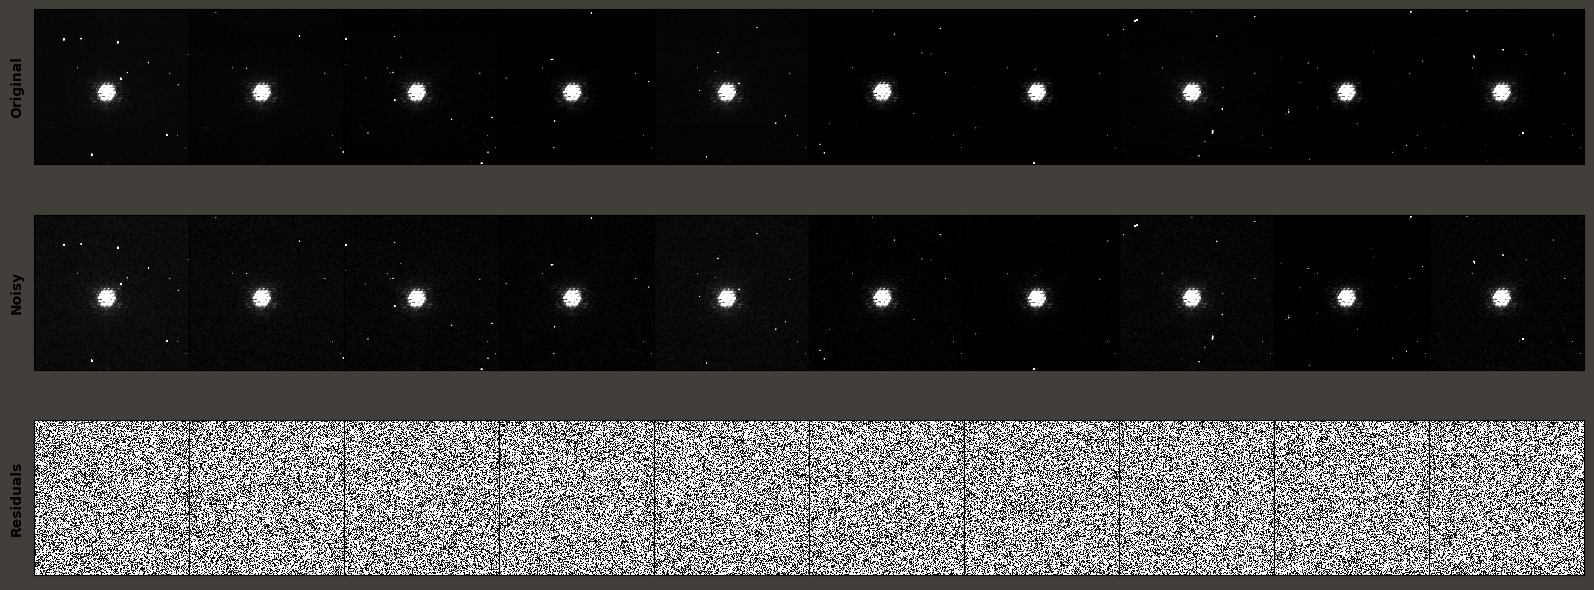

In [8]:
visualize_noise(final_1386,noisy_gauss_1386)

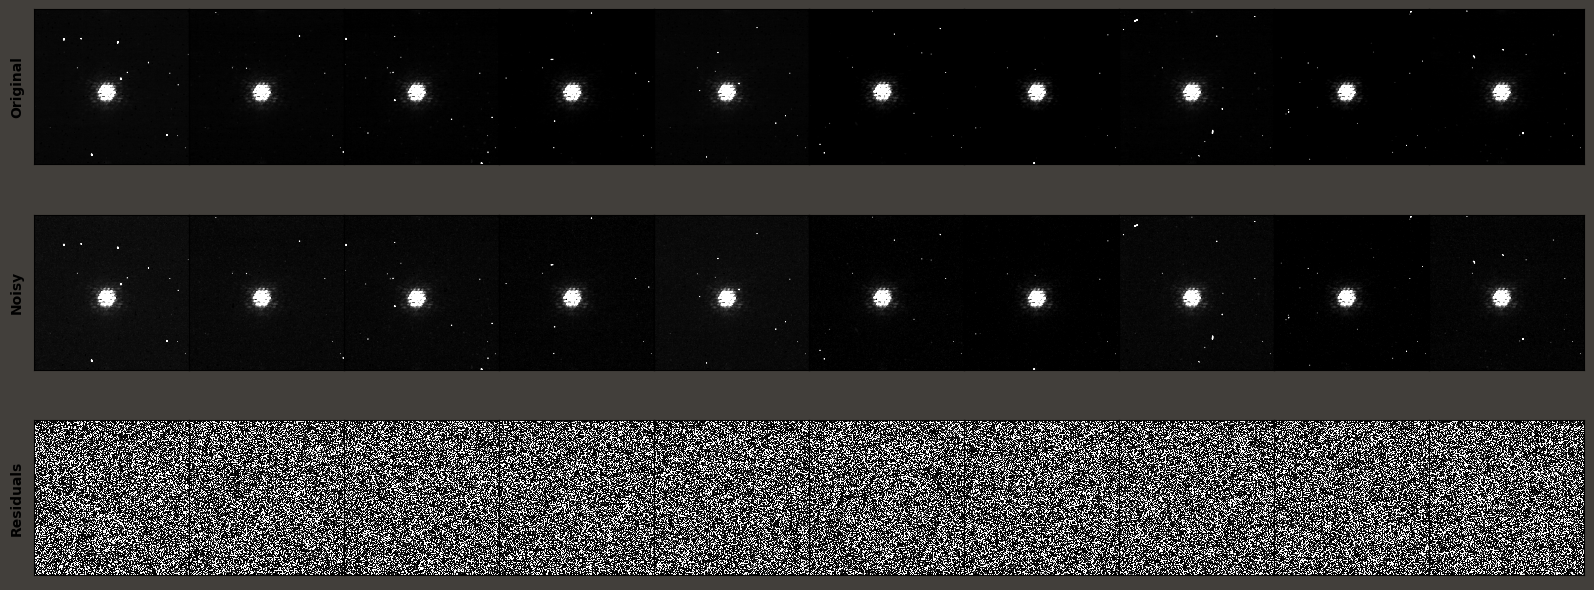

In [9]:
visualize_noise(final_1386,noisy_exp_1386)

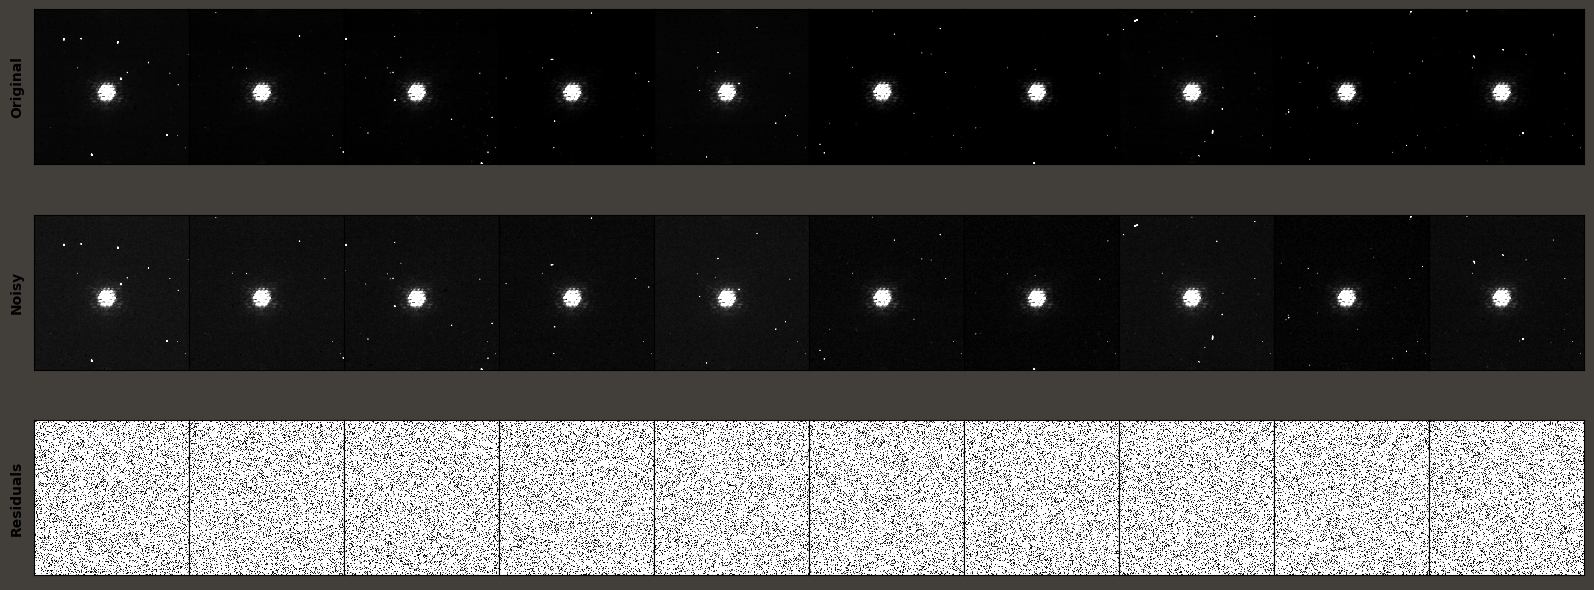

In [10]:
visualize_noise(final_1386,noisy_rayleigh_1386)

In [11]:
data_1386.create_dataset('fullstack_gaussian4_10_noise',data=noisy_gauss_1386)
data_1386.create_dataset('fullstack_exp_5_noise',data=noisy_exp_1386)
data_1386.create_dataset('fullstack_rayleigh_3_noise',data=noisy_rayleigh_1386)

<HDF5 dataset "fullstack_rayleigh_3_noise": shape (126, 320, 320), type "<f8">

# 1441

In [12]:
keys_1441 = [x for x in data_1441.keys()] # get list of keys for each psfstack
f = np.concatenate((np.array(data_1441[keys_1441[0]]),np.array(data_1441[keys_1441[1]]))) 
final_1441 = np.concatenate((f,np.array(data_1441[keys_1441[2]])))

In [13]:
final_1441.shape

(669, 320, 320)

In [14]:
gaussian_noise_1441    = np.random.normal(1,4,(669,320,320))
exponantial_noise_1441 = np.random.exponential(3,(669,320,320))
rayleigh_noise_1441    = np.random.rayleigh(5,(669,320,320))

In [15]:
noisy_gauss_1441 = final_1441 + gaussian_noise_1441 
noisy_exp_1441   = final_1441 + exponantial_noise_1441
noisy_rayleigh_1441 = final_1441 + 3*rayleigh_noise_1441

In [16]:
data_1441.create_dataset('stacked_gaussian4_10_noise',data=noisy_gauss_1441)
data_1441.create_dataset('stacked_exp_3_noise',data=noisy_exp_1441)
data_1441.create_dataset('stacked_rayleigh_5_noise',data=noisy_rayleigh_1441)

<HDF5 dataset "stacked_rayleigh_5_noise": shape (669, 320, 320), type "<f8">